# **TRATAMENTO DOS DADOS**

In [1]:
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("Books_Data_Clean.csv")

In [3]:
df.head(2)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250


## **Excluindo a coluna "Index"**

In [4]:
df.head(1)

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000


In [5]:
df.drop('index', axis=1, inplace=True)
df.head(1)

,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000


## **Traduzindo os nomes das colunas**

In [6]:

colunas_traduzidas = {
    'Publishing Year': 'Ano de Publicação',
    'Book Name': 'Título',
    'Author': 'Autor',
    'language_code': 'Idioma',
    'Author_Rating': 'Nível do Autor',
    'Book_average_rating': 'Avaliação Média',
    'Book_ratings_count': 'Contagem de Avaliações',
    'genre': 'Gênero',
    'gross sales': 'Vendas Brutas',
    'publisher revenue': 'Receita do Editor',
    'sale price': 'Preço de Venda',
    'sales rank': 'Ranking de Vendas',
    'Publisher ': 'Editora',
    'units sold': 'Unidades Vendidas'
}

df.rename(columns=colunas_traduzidas, inplace=True)

## **Traduzindo os valores**

In [7]:
# Nível do Autor

df.replace('Novice', 'Iniciante', inplace=True)
df.replace('Intermediate', 'Intermediário', inplace=True)
df.replace('Famous', 'Famoso', inplace=True)
df.replace('Excellent', 'Excelente', inplace=True)

# Gênero

df.replace('genre fiction', 'Ficção Científica', inplace=True)
df.replace('nonfiction', 'Outro', inplace=True)
df.replace('fiction', 'Ficção Científica', inplace=True)
df.replace('children', 'Infantil', inplace=True)

# Idioma

df.replace('en-US', 'Inglês', inplace=True)
df.replace('en-GB', 'Inglês', inplace=True)
df.replace('en-CA', 'Inglês', inplace=True)
df.replace('eng', 'Inglês', inplace=True)
df.replace('spa', 'Espanhol', inplace=True)
df.replace('fre', 'Francês', inplace=True)
df.replace('nl', 'Holandês', inplace=True)
df.replace('ara', 'Árabe', inplace=True)

## Valores não informados forma definidos como "Outro"

df.Idioma.fillna('Outro', inplace=True)

## **Ano de Publicação com valores nulos**

In [8]:
df[df['Ano de Publicação'].isnull()]

,Ano de Publicação,Título,Autor,Idioma,Nível do Autor,Avaliação Média,Contagem de Avaliações,Gênero,Vendas Brutas,Receita do Editor,Preço de Venda,Ranking de Vendas,Editora,Unidades Vendidas
445,NaN,NaN,"Robert Kapilow, Dr. Seuss",Outro,Famoso,4.44,90574,Outro,532.22,319.332,2.99,493,Hachette Book Group,4806


In [9]:
# Removendo o registro com o Ano de Publicação não informado

df.dropna(subset=['Ano de Publicação'], inplace=True)

## **Formatando o "Ano de Publicação" como INT**

In [10]:
# Alterando o tipo da coluna de FLOAT para INT

df['Ano de Publicação'] = df['Ano de Publicação'].astype(int)

## **Excluindo livros publicados antes de Cristo**

In [11]:
df.sort_values('Ano de Publicação').head(2)

,Ano de Publicação,Título,Autor,Idioma,Nível do Autor,Avaliação Média,Contagem de Avaliações,Gênero,Vendas Brutas,Receita do Editor,Preço de Venda,Ranking de Vendas,Editora,Unidades Vendidas
589,-560,Aesopica,"Aesop, Laura Harris, Laura Gibbs",Inglês,Excelente,4.05,88508,Ficção Científica,693.61,0.000,4.99,663,"Amazon Digital Services, Inc.",53784
990,-441,á¼ˆÎ½Ï„Î¹Î³ÏŒÎ½Î·,"Sophocles, J.E. Thomas",Inglês,Intermediário,3.60,67608,Ficção Científica,106.92,64.152,0.99,1167,"Amazon Digital Services, Inc.",108


In [12]:
# Excluido livros com "Ano de Publicação" negativo

df.drop(df[df['Ano de Publicação'] < 0].index,  inplace=True)

df.sort_values('Ano de Publicação').head(2)

,Ano de Publicação,Título,Autor,Idioma,Nível do Autor,Avaliação Média,Contagem de Avaliações,Gênero,Vendas Brutas,Receita do Editor,Preço de Venda,Ranking de Vendas,Editora,Unidades Vendidas
636,1308,La Divina Commedia,"Dante Alighieri, Allen Mandelbaum, Eugenio Mon...",Inglês,Excelente,4.06,74130,Ficção Científica,124.74,0.000,0.99,720,"Amazon Digital Services, Inc.",46008
446,1320,Inferno,"Dante Alighieri, Anthony M. Esolen",Outro,Intermediário,3.99,87511,Ficção Científica,354.22,212.532,1.99,493,Hachette Book Group,4806


## **Excluindo livros sem títulos**

In [13]:
print(f"Existem {df['Título'].isna().sum()} livros sem título")

Existem 22 livros sem título


In [14]:
df.dropna(subset=['Título'], inplace=True)

## **Quantidade de valores não nulos**





In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 0 to 1069
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ano de Publicação       1041 non-null   int64  
 1   Título                  1041 non-null   object 
 2   Autor                   1041 non-null   object 
 3   Idioma                  1041 non-null   object 
 4   Nível do Autor          1041 non-null   object 
 5   Avaliação Média         1041 non-null   float64
 6   Contagem de Avaliações  1041 non-null   int64  
 7   Gênero                  1041 non-null   object 
 8   Vendas Brutas           1041 non-null   float64
 9   Receita do Editor       1041 non-null   float64
 10  Preço de Venda          1041 non-null   float64
 11  Ranking de Vendas       1041 non-null   int64  
 12  Editora                 1041 non-null   object 
 13  Unidades Vendidas       1041 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usa

# **Editoras iguais com nome diferentes**

In [16]:
df.replace('HarperCollins Publishing', 'HarperCollins Publisher', inplace = True)
df.replace('HarperCollins Christian Publishing', 'HarperCollins Publisher', inplace=True)
df.replace('HarperCollins Publishers', 'HarperCollins Publisher', inplace=True)

df['Editora'] = df['Editora'].str.split(' ').str[0]

# **MANIPULAÇÃO DOS DADOS**

# **Criando a coluna "Categoria da Avaliação"**

In [17]:
# Definindo os intervalos
df['Avaliação Média'].quantile([0.33, 0.66])

,Avaliação Média
0.33,3.91
0.66,4.12


Text(4.5, 110, 'Alta')

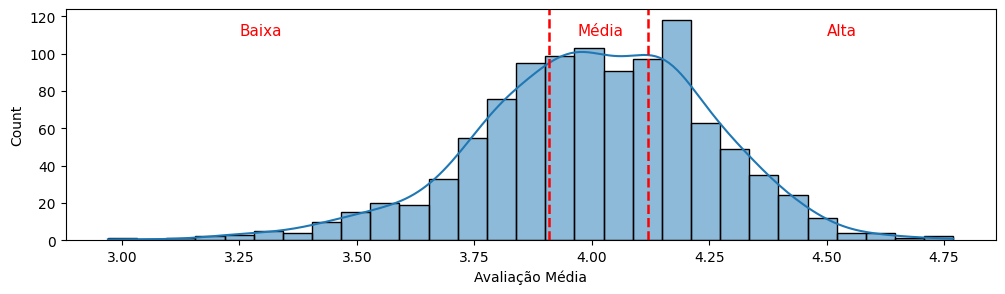

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o tamanho da figura
plt.figure(figsize=(12, 3))

# Criando o histograma
sns.histplot(df['Avaliação Média'], kde=True)

# Criando as linhas
plt.axvline(x=3.91, color='red', linestyle='--', linewidth=1.8)
plt.axvline(x=4.12, color='red', linestyle='--', linewidth=1.8)

# Criando os textos
plt.text(x=3.25, y = 110, s='Baixa', color='red', fontsize = 11)
plt.text(x=3.97, y = 110, s='Média', color='red', fontsize = 11)
plt.text(x=4.5, y = 110, s='Alta', color='red', fontsize = 11)

In [19]:
df['Categoria de Avaliação'] = pd.cut(df['Avaliação Média'], bins=[0, 3.91, 4.12, 5], labels=['Baixa', 'Média', 'Alta'])

df.head(2)

,Ano de Publicação,Título,Autor,Idioma,Nível do Autor,Avaliação Média,Contagem de Avaliações,Gênero,Vendas Brutas,Receita do Editor,Preço de Venda,Ranking de Vendas,Editora,Unidades Vendidas,Categoria de Avaliação
0,1975,Beowulf,"Unknown, Seamus Heaney",Inglês,Iniciante,3.42,155903,Ficção Científica,34160.0,20496.0,4.88,1,HarperCollins,7000,Baixa
1,1987,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",Inglês,Intermediário,4.23,145267,Ficção Científica,12437.5,7462.5,1.99,2,HarperCollins,6250,Alta


In [20]:
df['Categoria de Avaliação'].value_counts()

,count
Categoria de Avaliação,
Baixa,359
Alta,346
Média,336


# **ANÁLISE DE DADOS**

In [29]:
print(f"A MAIOR avaliacao é de {df['Avaliação Média'].max()}")
print(f"A MENOR avaliação é de {df['Avaliação Média'].min()}")
print(f"A MÉDIA de avaliação é de {round(df['Avaliação Média'].mean(), 2)}")
print(f"A MEDIANA de avaliação é de {round(df['Avaliação Média'].median(), 2)}")

A MAIOR avaliacao é de 4.77
A MENOR avaliação é de 2.97
A MÉDIA de avaliação é de 4.0
A MEDIANA de avaliação é de 4.01


In [31]:
print(f"A MAIOR quantidade de vendas de um livro é de {df['Unidades Vendidas'].max()}")
print(f"A MENOR quantidade de vendas de um livro é de {df['Unidades Vendidas'].min()}")
print(f"A MÉDIA de quantidade de vendas de um livro é de {round(df['Unidades Vendidas'].mean())}")
print(f"A MEDIANA de quantidade de vendas de um livro é de {round(df['Unidades Vendidas'].median())}")

A MAIOR quantidade de vendas de um livro é de 61560
A MENOR quantidade de vendas de um livro é de 106
A MÉDIA de quantidade de vendas de um livro é de 9769
A MEDIANA de quantidade de vendas de um livro é de 3942


In [33]:
print(f"O MAIOR preço de um livro é de ${df['Preço de Venda'].max()}")
print(f"O MENOR preço de um livro é de ${df['Preço de Venda'].min()}")
print(f"A MÉDIA de preço de um livro é de ${round(df['Preço de Venda'].mean(), 2)}")
print(f"A MEDIANA de preço de um livro é de ${round(df['Preço de Venda'].median(), 2)}")

O MAIOR preço de um livro é de $33.86
O MENOR preço de um livro é de $0.99
A MÉDIA de preço de um livro é de $4.85
A MEDIANA de preço de um livro é de $3.99


# **Descobrir a editora ideal para realizar uma parceria**

In [35]:
df_editora = df.groupby('Editora')['Vendas Brutas'].sum().sort_values(ascending=False)
df_editora

,Vendas Brutas
Editora,
Amazon,720215.06
Penguin,335830.44
Random,297995.37
Hachette,225071.47
HarperCollins,218249.63
Simon,78313.92
Macmillan,53927.06


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

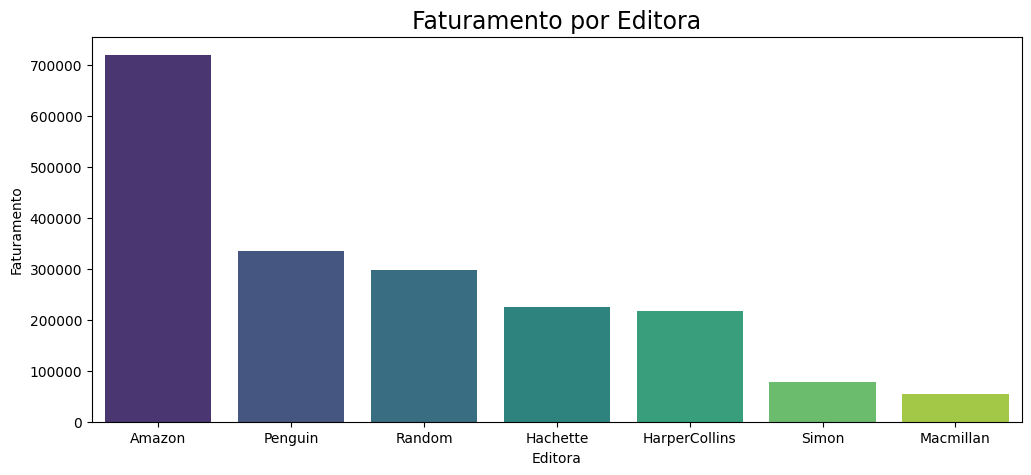

In [36]:
plt.figure(figsize = (12,5))

sns.barplot(x=df_editora.index, y=df_editora.values, palette='viridis')

plt.ylabel('Faturamento')
plt.title('Faturamento por Editora', size = 17)

plt.show()

# **Contagem de Categoria de Avaliação por Editora**

<Axes: xlabel='Editora', ylabel='count'>

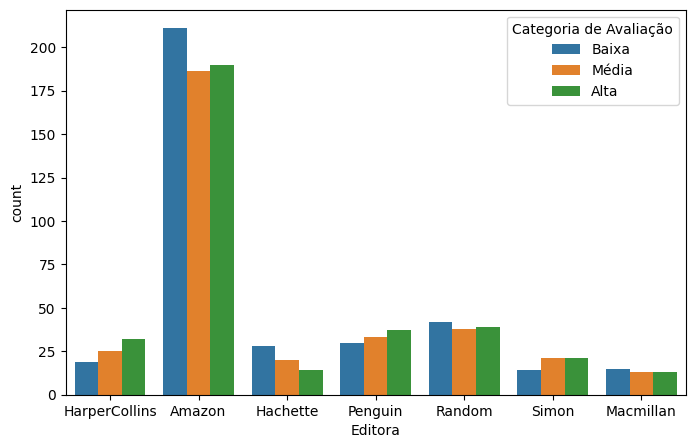

In [40]:
plt.figure(figsize = (8, 5))

sns.countplot(x='Editora', hue='Categoria de Avaliação', data=df)

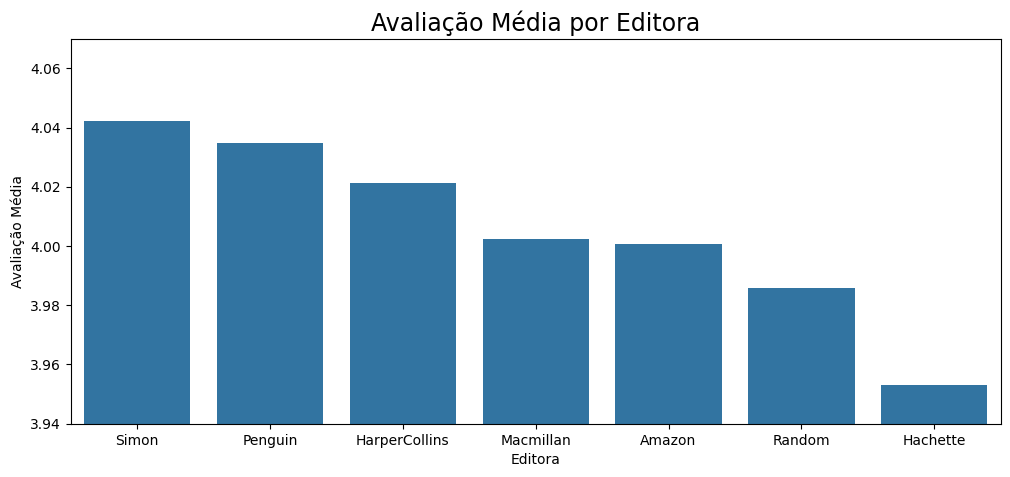

In [41]:
plt.figure(figsize = (12,5))

sns.barplot(df.groupby(['Editora'])['Avaliação Média'].mean().sort_values(ascending=False))

plt.ylim(3.94, 4.07)

plt.ylabel('Avaliação Média')
plt.title('Avaliação Média por Editora', size = 17)

plt.show()